In [131]:
# Import the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [132]:
# Read the dataframe

customers = pd.read_csv(r'C:\Users\hp\Downloads\Sales python project\Sales python project\csv\customers.csv')
order_items = pd.read_csv(r'C:\Users\hp\Downloads\Sales python project\Sales python project\csv\order_items.csv')
orders = pd.read_csv(r'C:\Users\hp\Downloads\Sales python project\Sales python project\csv\orders.csv')
products = pd.read_csv(r'C:\Users\hp\Downloads\Sales python project\Sales python project\csv\products.csv')
sales = pd.read_csv(r'C:\Users\hp\Downloads\Sales python project\Sales python project\csv\sales.csv')
salespersons = pd.read_csv(r'C:\Users\hp\Downloads\Sales python project\Sales python project\csv\salespersons.csv')


##### Data Cleaning and Preprocessing

In [133]:
# Convert 'Date' to datetime

orders['OrderDate'] = pd.to_datetime(orders['OrderDate'], errors='coerce')

In [134]:
# Find the shape of each DataFrame

{ name: df.shape for name, df in {
    'customers': customers,
    'order_items': order_items,
    'orders': orders,
    'products': products,
    'sales': sales,
    'salespersons': salespersons
}.items() }


{'customers': (1000, 8),
 'order_items': (3000, 4),
 'orders': (1500, 3),
 'products': (98, 5),
 'sales': (10000, 5),
 'salespersons': (50, 4)}

In [135]:
# Check the number of missing (null/NaN) values in each column of a DataFrame

print("\nMissing values")
{ name: df.isnull().sum() for name, df in {
    'customers': customers,
    'order_items': order_items,
    'orders': orders,
    'products': products,
    'sales': sales,
    'salespersons': salespersons
}.items() }



Missing values


{'customers': CustomerID    0
 FirstName     0
 LastName      0
 Email         0
 Address       0
 City          0
 State         0
 ZipCode       0
 dtype: int64,
 'order_items': OrderItemID    0
 OrderID        0
 ProductID      0
 Quantity       0
 dtype: int64,
 'orders': OrderID       0
 CustomerID    0
 OrderDate     0
 dtype: int64,
 'products': ProductID      0
 ProductName    0
 Category       0
 UnitPrice      0
 Profit         0
 dtype: int64,
 'sales': SalesID           0
 OrderID           0
 SalesPersonID     0
 SaleDate          0
 CommissionRate    0
 dtype: int64,
 'salespersons': SalesPersonID    0
 FirstName        0
 LastName         0
 Region           0
 dtype: int64}

In [136]:
# Handling the Duplicates

{ name: df.duplicated().sum() for name, df in {
    'customers': customers,
    'order_items': order_items,
    'orders': orders,
    'products': products,
    'sales': sales,
    'salespersons': salespersons
}.items() }


{'customers': 0,
 'order_items': 0,
 'orders': 0,
 'products': 0,
 'sales': 0,
 'salespersons': 0}

In [137]:
# Returns the data type of each column in the DataFrame

{ name: df.dtypes for name, df in {
    'customers': customers,
    'order_items': order_items,
    'orders': orders,
    'products': products,
    'sales': sales,
    'salespersons': salespersons
}.items() }


{'customers': CustomerID     int64
 FirstName     object
 LastName      object
 Email         object
 Address       object
 City          object
 State         object
 ZipCode        int64
 dtype: object,
 'order_items': OrderItemID    int64
 OrderID        int64
 ProductID      int64
 Quantity       int64
 dtype: object,
 'orders': OrderID                int64
 CustomerID             int64
 OrderDate     datetime64[ns]
 dtype: object,
 'products': ProductID        int64
 ProductName     object
 Category        object
 UnitPrice      float64
 Profit         float64
 dtype: object,
 'sales': SalesID             int64
 OrderID             int64
 SalesPersonID       int64
 SaleDate           object
 CommissionRate    float64
 dtype: object,
 'salespersons': SalesPersonID     int64
 FirstName        object
 LastName         object
 Region           object
 dtype: object}

##### Exploratory Data Analysis (EDA)

- Univariate Analysis

In [138]:
# Extract the Numerical Column

numerical_columns = {
    'customers': [], 
    'orders': ['OrderID', 'CustomerID'],
    'order_items': ['OrderItemID', 'OrderID', 'ProductID', 'Quantity'],
    'products': ['ProductID', 'UnitPrice', 'Profit'],
    'sales': ['SalesID', 'OrderID', 'SalesPersonID', 'CommissionRate'],
    'salespersons': ['SalesPersonID']
}

In [139]:
# Variance of each of the specified numerical columns
# Variance Analysis helps you see how much the numbers are changing or spreading out from the average.
{
    name: df.select_dtypes(include=['int64', 'float64']).var()
    for name, df in {
        'customers': customers,
        'order_items': order_items,
        'orders': orders,
        'products': products,
        'sales': sales,
        'salespersons': salespersons
    }.items()
}


{'customers': CustomerID    8.341667e+04
 ZipCode       8.078336e+08
 dtype: float64,
 'order_items': OrderItemID    750250.000000
 OrderID        185679.019246
 ProductID         827.434343
 Quantity            1.256390
 dtype: float64,
 'orders': OrderID       187625.000000
 CustomerID     79155.371136
 dtype: float64,
 'products': ProductID      808.500000
 UnitPrice    93243.914479
 Profit        5708.758429
 dtype: float64,
 'sales': SalesID           8.334167e+06
 OrderID           1.865613e+05
 SalesPersonID     2.057814e+02
 CommissionRate    6.678354e-04
 dtype: float64,
 'salespersons': SalesPersonID    212.5
 dtype: float64}

In [140]:
# Count of product category 

products['Category'].value_counts()

Category
Electronics    22
Home Goods     22
Clothing       19
Food           18
Books          17
Name: count, dtype: int64

- Categorical Columns

In [141]:
categorical_columns = {
    'customers': ['Address', 'City', 'Email', 'FirstName', 'LastName', 'State'],
    'orders': [],
    'order_items': [],
    'products': ['Category', 'ProductName'],
    'sales': [],
    'salespersons': ['FirstName', 'LastName', 'Region']
}

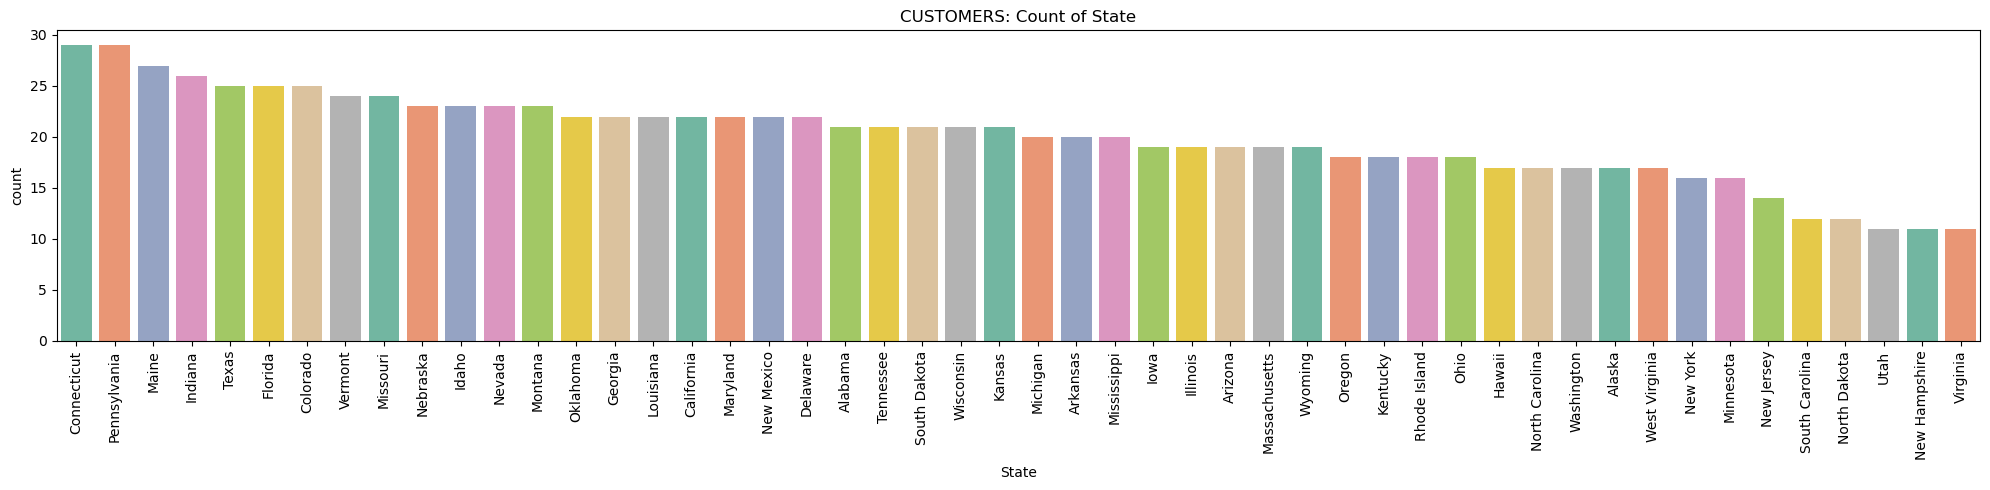

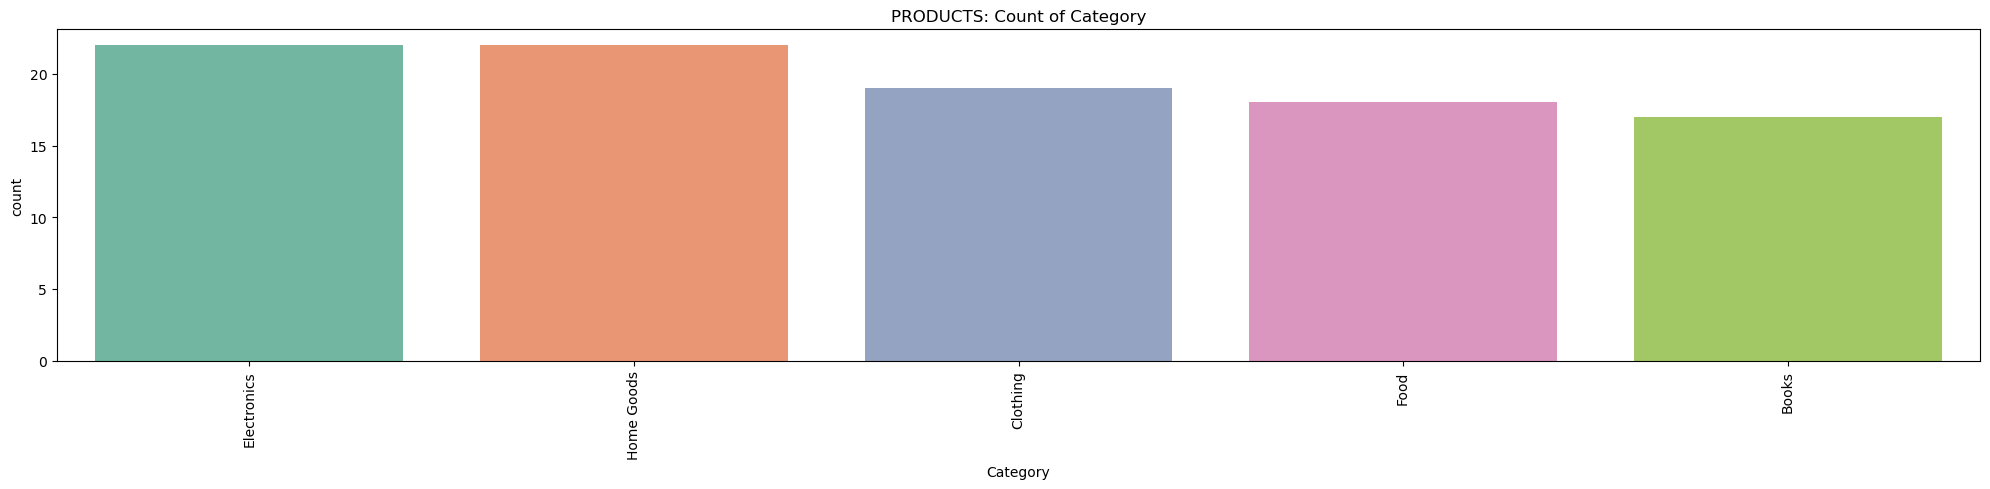

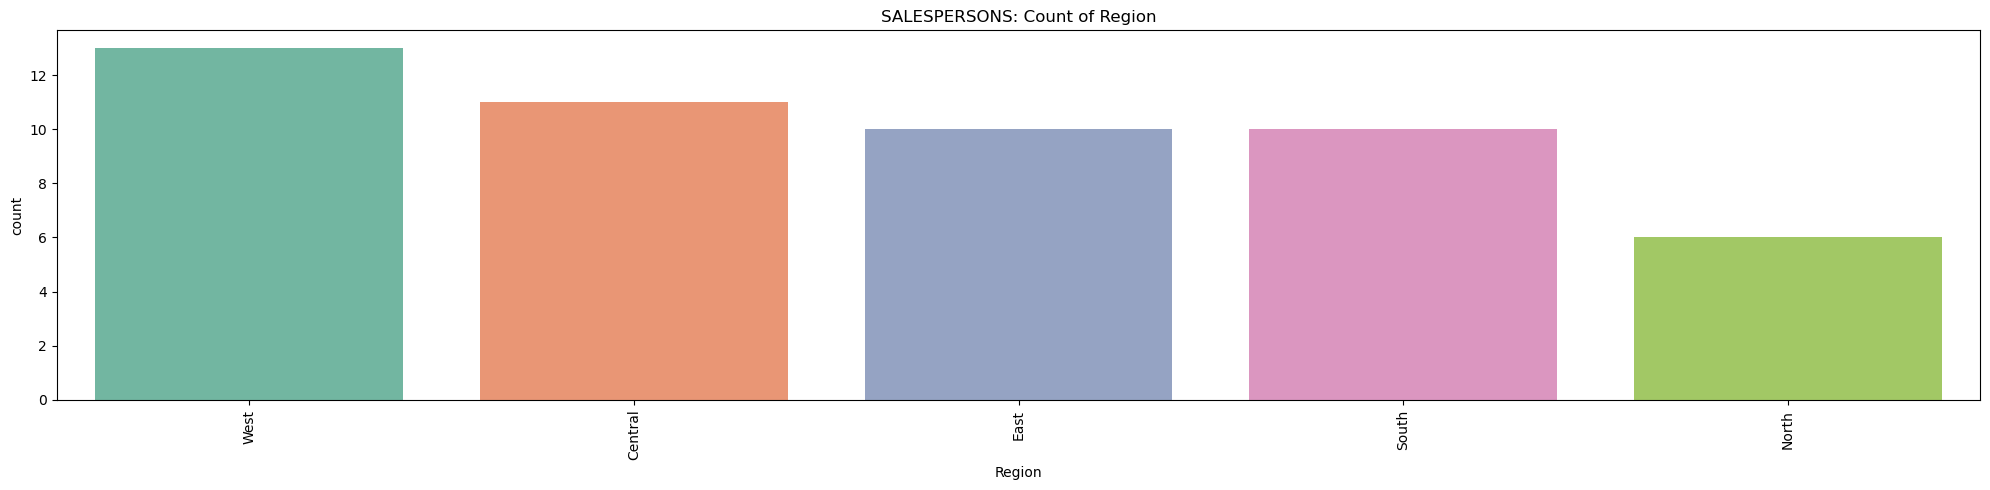

In [142]:
# Categorical columns for each table

tables = {
    'customers': customers,
    'orders': orders,
    'order_items': order_items,
    'products': products,
    'sales': sales,
    'salespersons': salespersons
}

categorical_columns = {
    'customers': ['State'],
    'orders': [],
    'order_items': [],
    'products': ['Category'],
    'sales': [],
    'salespersons': ['Region']
}


for table_name, cols in categorical_columns.items():
    df = tables[table_name]
    
    for col in cols:
        plt.figure(figsize=(20, 5))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set2')
        plt.xticks(rotation=90)
        plt.title(f'{table_name.upper()}: Count of {col}')
        plt.tight_layout()
        plt.show()


- Bivariate Analysis

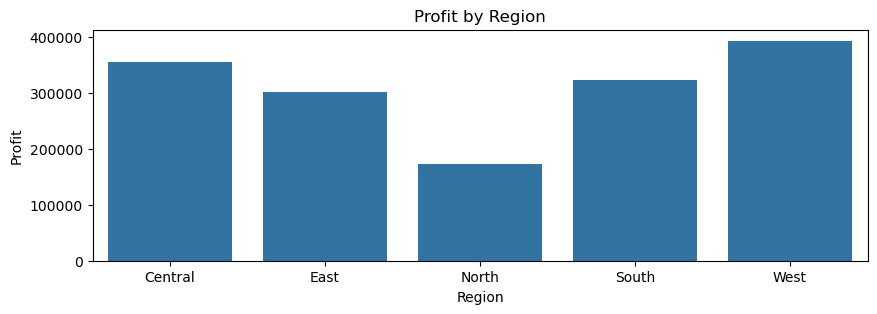

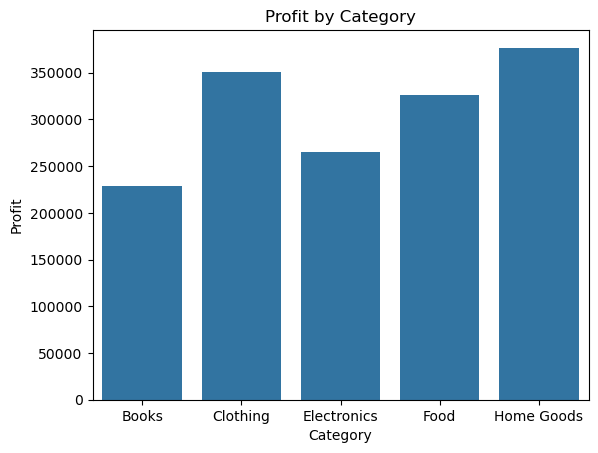

In [143]:
# Profit by region
# Profit by category
# Quantity vs Profit 

df = sales.merge(salespersons, on='SalesPersonID').merge(orders, on='OrderID').merge(order_items, on='OrderID').merge(products, on='ProductID')


plt.figure(figsize=(10, 3))
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
sns.barplot(data=region_profit, x='Region', y='Profit')
plt.title("Profit by Region")
plt.show()

category_profit = df.groupby('Category')['Profit'].sum().reset_index()
sns.barplot(data=category_profit, x='Category', y='Profit')
plt.title("Profit by Category")
plt.show()


*Exploratory Data Analysis*

-  Customer & Order Analysis

1. I need to understand our customer base better. Can you provide a list of the top 5 customers who are placing the most orders? I want to see if we should implement a loyalty program for them.


In [144]:
orders['CustomerID'].value_counts().nlargest(5).index

Index([531, 748, 352, 423, 78], dtype='int64', name='CustomerID')

In [145]:
customers[customers["CustomerID"].isin(orders['CustomerID'].value_counts().nlargest(5).index)]

,CustomerID,FirstName,LastName,Email,Address,City,State,ZipCode
77,78,Stephen,Mack,samuelcarter@example.net,76789 Hall Circle Apt. 695\nWest Patriciachest...,Barnesbury,Kansas,94937
351,352,Amanda,Rose,christinaschultz@example.com,"PSC 5638, Box 3000\nAPO AP 13938",Port Malik,Colorado,95802
422,423,James,Mcneil,jessicaanderson@example.com,"434 Michael Village Suite 524\nJessicamouth, N...",New Matthewhaven,Georgia,7702
530,531,David,Mitchell,harrismichele@example.net,"271 Donald Cove\nLake Jimmy, WV 47728",Bobbystad,Montana,69155
747,748,Andrea,Brown,michelleparker@example.net,"9756 Dean Land Suite 955\nRonaldburgh, IA 33436",New Albert,Maryland,50464


2. What's the trend in order frequency? Show me how many orders each customer has placed. This will help us identify potential churn or growth areas.


In [146]:
orders['CustomerID'].value_counts()[orders['CustomerID'].value_counts() >= 2].sort_index(ascending=True)

CustomerID
2      3
4      2
7      2
11     2
15     3
      ..
987    3
992    2
994    4
995    3
996    2
Name: count, Length: 459, dtype: int64

In [147]:
customers[customers['CustomerID'].isin(orders['CustomerID'].value_counts()[orders['CustomerID'].value_counts() >=2].index.sort_values(ascending=True))]

,CustomerID,FirstName,LastName,Email,Address,City,State,ZipCode
1,2,Angel,Jennings,joshua89@example.net,"7262 Sims Squares\nPort Courtneyfurt, MH 91039",Cartershire,California,47606
3,4,Jeffrey,Levine,comptonshelly@example.net,"65790 Richardson Rue\nNew Jennaborough, DC 44400",North Richardhaven,Maryland,73445
6,7,Patricia,Lopez,karenwells@example.org,"1124 Heidi Parks\nPort James, SC 03475",Tinaview,Nevada,61365
10,11,Jeffery,Bates,nielsenmelanie@example.org,"552 West Estates\nDavidtown, MO 65960",Floreschester,Arkansas,17229
14,15,Debra,Buchanan,susan03@example.org,"637 Morrison Pass\nLake Michaelberg, VT 56552",Port Alexis,Kansas,3611
...,...,...,...,...,...,...,...,...
986,987,Sonya,Morales,bbrown@example.org,"04410 Jasmine Park Suite 193\nWest Nathan, WI ...",Cisnerostown,New Hampshire,22076
991,992,Corey,Gordon,wbarnes@example.com,"57795 Brian Park\nEast Matthew, AS 74305",West Christina,North Dakota,39799
993,994,Ricky,Cabrera,belindatran@example.org,"38690 Wilkerson Shoal\nSimpsonburgh, DE 03771",Stantonside,Florida,14459
994,995,Stephanie,Dennis,jenkinsaimee@example.org,"4617 Ashley Plaza Apt. 707\nKirkchester, AR 19467",South Tracy,Alabama,31768


In [148]:
y = customers[customers["CustomerID"].isin(orders["CustomerID"].value_counts()[orders["CustomerID"].value_counts() >= 2].sort_index(ascending=True).index)]
y["Total_Orders_placed"] = orders["CustomerID"].value_counts()[orders["CustomerID"].value_counts() >= 2].sort_index(ascending=True).values
y


,CustomerID,FirstName,LastName,Email,Address,City,State,ZipCode,Total_Orders_placed
1,2,Angel,Jennings,joshua89@example.net,"7262 Sims Squares\nPort Courtneyfurt, MH 91039",Cartershire,California,47606,3
3,4,Jeffrey,Levine,comptonshelly@example.net,"65790 Richardson Rue\nNew Jennaborough, DC 44400",North Richardhaven,Maryland,73445,2
6,7,Patricia,Lopez,karenwells@example.org,"1124 Heidi Parks\nPort James, SC 03475",Tinaview,Nevada,61365,2
10,11,Jeffery,Bates,nielsenmelanie@example.org,"552 West Estates\nDavidtown, MO 65960",Floreschester,Arkansas,17229,2
14,15,Debra,Buchanan,susan03@example.org,"637 Morrison Pass\nLake Michaelberg, VT 56552",Port Alexis,Kansas,3611,3
...,...,...,...,...,...,...,...,...,...
986,987,Sonya,Morales,bbrown@example.org,"04410 Jasmine Park Suite 193\nWest Nathan, WI ...",Cisnerostown,New Hampshire,22076,3
991,992,Corey,Gordon,wbarnes@example.com,"57795 Brian Park\nEast Matthew, AS 74305",West Christina,North Dakota,39799,2
993,994,Ricky,Cabrera,belindatran@example.org,"38690 Wilkerson Shoal\nSimpsonburgh, DE 03771",Stantonside,Florida,14459,4
994,995,Stephanie,Dennis,jenkinsaimee@example.org,"4617 Ashley Plaza Apt. 707\nKirkchester, AR 19467",South Tracy,Alabama,31768,3


3. I want to see the details of every order. Can you generate a report showing the customer's full name, order date, product name, and quantity for each item ordered? This will help us understand customer purchasing patterns.


In [149]:
z = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID') 
z = z[['FirstName', 'LastName', 'OrderDate', 'ProductName', 'Quantity', 'Profit']]
z["FullName"] = z["FirstName"] + " " + z["LastName"]
z = z[['FullName', 'OrderDate', 'ProductName', 'Quantity']]
z

,FullName,OrderDate,ProductName,Quantity
0,Danielle Garcia,2024-07-06,Keyboard,4
1,Danielle Garcia,2024-07-06,Printer,3
2,Danielle Garcia,2024-07-06,Sweater,1
3,Danielle Garcia,2024-07-06,Wallet,3
4,Danielle Garcia,2024-07-06,Poetry,2
...,...,...,...,...
2995,Stephanie Dennis,2024-12-20,Cutlery,2
2996,Mitchell Harper,2024-12-14,Shoes,2
2997,Mitchell Harper,2024-12-14,Science Fiction,1
2998,Scott Chambers,2024-06-28,Textbook,3


4. Which customer bought the most products in terms of quantity

In [150]:
a = order_items.merge(orders, on='OrderID')
customer_quantity = a.groupby('CustomerID')['Quantity'].sum().reset_index()
customer_quantity = customer_quantity.merge(customers, on='CustomerID')
top_customer = customer_quantity.sort_values(by='Quantity', ascending=False).head(1)
print("Customer who bought the most products:")
print(top_customer[['CustomerID', 'FirstName', 'LastName', 'Quantity']])


Customer who bought the most products:
     CustomerID FirstName LastName  Quantity
596         809    Andrea   Pierce        55


- Product & Sales Performance

1. Which product categories are generating the most revenue? I want to know where we should focus our marketing efforts. Calculate the total revenue per category. 


In [151]:
z = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID') 
z = z[['OrderDate','Quantity','Category','UnitPrice','Profit']]
z["Revenue"] = z["Quantity"] * z["UnitPrice"]
z

,OrderDate,Quantity,Category,UnitPrice,Profit,Revenue
0,2024-07-06,4,Home Goods,448.022259,-4.907834,1792.089037
1,2024-07-06,3,Food,657.595273,169.012031,1972.785819
2,2024-07-06,1,Books,98.210214,17.633206,98.210214
3,2024-07-06,3,Electronics,493.590827,157.536752,1480.772481
4,2024-07-06,2,Books,108.769959,-0.387343,217.539918
...,...,...,...,...,...,...
2995,2024-12-20,2,Home Goods,572.168176,141.057309,1144.336352
2996,2024-12-14,2,Clothing,444.924570,198.346051,889.849140
2997,2024-12-14,1,Books,796.246053,14.402787,796.246053
2998,2024-06-28,3,Food,924.773653,167.446993,2774.320960


In [152]:
z.groupby( by ='Category')['Revenue'].sum().sort_values(ascending=False).round()

Category
Food           789642.0
Home Goods     777376.0
Electronics    705128.0
Clothing       636548.0
Books          572987.0
Name: Revenue, dtype: float64

2. What's the average unit price for each product category? I need this to evaluate our pricing strategy.


In [153]:
products.groupby(by = 'Category')['UnitPrice'].mean().sort_values(ascending=False).round()

Category
Food           568.0
Electronics    506.0
Home Goods     437.0
Clothing       413.0
Books          402.0
Name: UnitPrice, dtype: float64

3. Which products are profitable, and which are losing money? I need to see the average unit price, and profit margin by product category. 


In [154]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID') 
y = x.groupby(by='ProductName')['Profit'].sum().round(0)
y

ProductName
Adapter      2307.0
Almanac      5798.0
Atlas       -1194.0
Bag          3643.0
Bed           -27.0
              ...  
Underwear    -182.0
Vase         4024.0
Wallet       3623.0
Webcam       -137.0
Yogurt       -496.0
Name: Profit, Length: 98, dtype: float64

In [155]:
Profit_product_list = y[y>0]
Profit_product_list

ProductName
Adapter      2307.0
Almanac      5798.0
Bag          3643.0
Belt         2119.0
Biography    4700.0
              ...  
Thriller     1314.0
Tie          1644.0
Top           469.0
Vase         4024.0
Wallet       3623.0
Name: Profit, Length: 76, dtype: float64

In [156]:
loss_product_list = y[y<0]
loss_product_list

ProductName
Atlas       -1194.0
Bed           -27.0
Bowl        -1202.0
Horror        -19.0
Jacket         -4.0
Juice        -631.0
Keyboard     -226.0
Lamp         -941.0
Magazine     -296.0
Newspaper    -612.0
Novel        -237.0
Painting     -366.0
Poetry        -11.0
Sauce       -1445.0
Skirt       -1120.0
Sofa          -78.0
Sugar       -1172.0
T-shirt      -145.0
USB Drive    -776.0
Underwear    -182.0
Webcam       -137.0
Yogurt       -496.0
Name: Profit, dtype: float64

I need to see the average unit price, and profit margin by product category. 

In [157]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID') 
x.groupby(by='Category').agg({'UnitPrice':'mean','Profit':'mean'})

,UnitPrice,Profit
Category,,
Books,417.436226,64.480976
Clothing,422.890714,83.290312
Electronics,474.216761,64.451542
Food,576.048527,87.994653
Home Goods,447.532895,84.123137


4. What are the top selling product in each region? 


In [158]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
y =  x.groupby( by =['Region','ProductName'])['Quantity'].sum().sort_values(ascending = False).reset_index()
y['RNK'] = y.groupby(by = ['Region'])['Quantity'].rank(method='dense',ascending = False).astype('int32')
y[y['RNK']<=3].sort_values(by = 'Region', ascending = True )

,Region,ProductName,Quantity,RNK
2,Central,Hat,210,1
11,Central,Cheese,190,2
12,Central,Memory card,189,3
21,East,Gloves,176,1
26,East,Cheese,174,2
35,East,Vase,162,3
194,North,Hat,109,1
208,North,Gloves,108,2
226,North,Webcam,103,3
228,North,Butter,103,3


5. I want to see the total number of products sold per product ID. This will help us with inventory management.

In [159]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID') 
x.groupby(by= ['ProductID','ProductName'])['Quantity'].sum()

ProductID  ProductName 
1          Carpet           60
2          Mystery Book     89
3          Power Bank       66
4          Butter          100
5          Laptop           58
                          ... 
94         T-shirt          78
95         Blouse           75
96         USB Drive        73
97         Monitor         102
98         Smartphone       63
Name: Quantity, Length: 98, dtype: int64

- Sales Team Performance & Commission

1. How much commission is each salesperson earning? I need this to assess their performance.


In [160]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
x['Revenue'] = x['Quantity'] * x['UnitPrice']
x['CommissionEarning'] = x['Revenue'] * x['CommissionRate']
x['SalesPerson_fullName'] = x['FirstName_y'] + " " + x['LastName_y']
x.groupby( by = ['SalesPersonID','SalesPerson_fullName'])['CommissionEarning'].sum().round(0)


SalesPersonID  SalesPerson_fullName
1              Amanda Miller           22546.0
2              Erica Gonzales          24170.0
3              Erin Navarro            24328.0
4              Deborah Cochran         26589.0
5              Jacqueline Watts        19977.0
6              Veronica Lowe           23537.0
7              Joanna Mason            23894.0
8              Caroline Brady          28623.0
9              Steven Mathis           25506.0
10             William Allen           22720.0
11             Jasmine Gomez           21932.0
12             Deborah Rodriguez       26909.0
13             Ross Harmon             28773.0
14             Jack Hubbard            26399.0
15             Brad James              23323.0
16             Michael Frank           26538.0
17             Christopher Stephens    27746.0
18             Holly Case              22759.0
19             Cory Watson             21948.0
20             Brent Snyder            22877.0
21             Thomas El

In [161]:
x.groupby( by = ['SalesPersonID','SalesPerson_fullName'])['CommissionEarning'].sum().sort_values(ascending=False).round(0).head(10)

SalesPersonID  SalesPerson_fullName
25             Ann Burgess             30719.0
26             Monica Morrow           29887.0
22             Alan Gonzalez           29639.0
47             Perry Evans             29608.0
49             Jacob Garcia            29149.0
40             Dawn Luna               28829.0
13             Ross Harmon             28773.0
8              Caroline Brady          28623.0
32             Jay Moses               28361.0
36             Nicole Cobb             27946.0
Name: CommissionEarning, dtype: float64

2. What percentage of total sales is each salesperson responsible for? This will help us evaluate their contribution.


In [162]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
x['Revenue'] = x['Quantity'] * x['UnitPrice']
x['CommissionEarning'] = x['Revenue'] * x['CommissionRate']
x['SalesPerson_fullName'] = x['FirstName_y'] + " " + x['LastName_y']
y = round(x.groupby( by = ['SalesPersonID','SalesPerson_fullName'])['Revenue'].sum() / x['Revenue'].sum() * 100, 1)


In [163]:
y = y.reset_index()
y[y['Revenue'] >= 2.4]

,SalesPersonID,SalesPerson_fullName,Revenue
16,17,Christopher Stephens,2.4
24,25,Ann Burgess,2.6
25,26,Monica Morrow,2.4


3. How many orders are each sales person responsible for ?


In [164]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
x['Revenue'] = x['Quantity'] * x['UnitPrice']
x['CommissionEarning'] = x['Revenue'] * x['CommissionRate']
x['SalesPerson_fullName'] = x['FirstName_y'] + " " + x['LastName_y']

x.groupby( by = ['SalesPersonID','SalesPerson_fullName'])['Quantity'].sum().sort_values(ascending=False)
y

,SalesPersonID,SalesPerson_fullName,Revenue
0,1,Amanda Miller,2.0
1,2,Erica Gonzales,1.8
2,3,Erin Navarro,2.0
3,4,Deborah Cochran,2.2
4,5,Jacqueline Watts,1.7
5,6,Veronica Lowe,1.9
6,7,Joanna Mason,2.0
7,8,Caroline Brady,2.2
8,9,Steven Mathis,2.0
9,10,William Allen,1.8


- Regional & Time-Based Analysis

1. I need to see the average unit price of products by category and region. This will help us tailor our pricing strategy for different markets. 


In [165]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
z = x.groupby(by=['Region','Category'])['UnitPrice'].mean().reset_index().round(0)
z.to_csv("Product price.csv",index=False)
z

,Region,Category,UnitPrice
0,Central,Books,412.0
1,Central,Clothing,418.0
2,Central,Electronics,479.0
3,Central,Food,574.0
4,Central,Home Goods,436.0
5,East,Books,399.0
6,East,Clothing,434.0
7,East,Electronics,470.0
8,East,Food,588.0
9,East,Home Goods,433.0


2. Breakdown of sales by product category and region, and also compute region-wise revenue

2. How are our sales trending over time? Create a pivot table showing the total quantity of products sold per category, broken down by year. 


In [166]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
x['OrderDate'] = pd.to_datetime(x['OrderDate'],errors='coerce')
x['OrderYear'] = x['OrderDate'].dt.year
x['Order_Month_Name'] = x['OrderDate'].dt.month_name()
x['Revenue'] = x['Quantity'] * x['UnitPrice']
x

,CustomerID,FirstName_x,LastName_x,Email,Address,City,State,ZipCode,OrderID,OrderDate,...,SalesID,SalesPersonID,SaleDate,CommissionRate,FirstName_y,LastName_y,Region,OrderYear,Order_Month_Name,Revenue
0,1,Danielle,Garcia,valerieboyd@example.com,3180 Dodson Curve Suite 431\nSouth Elizabethbu...,New Danielton,Minnesota,87651,1098,2024-07-06,...,699,48,2024-08-28,0.016560,Danny,Sims,West,2024,July,1792.089037
1,1,Danielle,Garcia,valerieboyd@example.com,3180 Dodson Curve Suite 431\nSouth Elizabethbu...,New Danielton,Minnesota,87651,1098,2024-07-06,...,1107,14,2024-12-09,0.088679,Jack,Hubbard,West,2024,July,1792.089037
2,1,Danielle,Garcia,valerieboyd@example.com,3180 Dodson Curve Suite 431\nSouth Elizabethbu...,New Danielton,Minnesota,87651,1098,2024-07-06,...,1964,4,2024-05-07,0.041534,Deborah,Cochran,South,2024,July,1792.089037
3,1,Danielle,Garcia,valerieboyd@example.com,3180 Dodson Curve Suite 431\nSouth Elizabethbu...,New Danielton,Minnesota,87651,1098,2024-07-06,...,2849,47,2025-03-03,0.066697,Perry,Evans,South,2024,July,1792.089037
4,1,Danielle,Garcia,valerieboyd@example.com,3180 Dodson Curve Suite 431\nSouth Elizabethbu...,New Danielton,Minnesota,87651,1098,2024-07-06,...,3419,41,2024-10-14,0.085378,Michael,Smith,Central,2024,July,1792.089037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19925,998,Scott,Chambers,ryan39@example.org,802 Gould Views Suite 985\nSouth Benjaminville...,Lisaville,Delaware,61726,716,2024-06-28,...,1674,13,2025-03-11,0.055887,Ross,Harmon,South,2024,June,2158.156950
19926,998,Scott,Chambers,ryan39@example.org,802 Gould Views Suite 985\nSouth Benjaminville...,Lisaville,Delaware,61726,716,2024-06-28,...,2985,36,2024-11-09,0.035299,Nicole,Cobb,Central,2024,June,2158.156950
19927,998,Scott,Chambers,ryan39@example.org,802 Gould Views Suite 985\nSouth Benjaminville...,Lisaville,Delaware,61726,716,2024-06-28,...,3907,38,2025-03-20,0.046574,Christopher,Thompson,North,2024,June,2158.156950
19928,998,Scott,Chambers,ryan39@example.org,802 Gould Views Suite 985\nSouth Benjaminville...,Lisaville,Delaware,61726,716,2024-06-28,...,6831,17,2025-03-23,0.058212,Christopher,Stephens,South,2024,June,2158.156950


In [167]:
x['OrderYear'].unique()

array([2024, 2025])

In [168]:
x.pivot_table(columns='OrderYear',index='Category',values='Quantity',aggfunc='sum')

OrderYear,2024,2025
Category,,
Books,6858,2106
Clothing,7644,2559
Electronics,7174,2480
Food,6700,2552
Home Goods,8518,3112


3. Create a Bar chart of total orders per month, to see if there is any seasonality in our sales.


In [169]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
x['OrderDate'] = pd.to_datetime(x['OrderDate'],errors='coerce')
x['OrderYear'] = x['OrderDate'].dt.year
x['Order_Month_Name'] = x['OrderDate'].dt.month_name()
x['Revenue'] = x['Quantity'] * x['UnitPrice']


<Axes: xlabel='Order_Month_Name'>

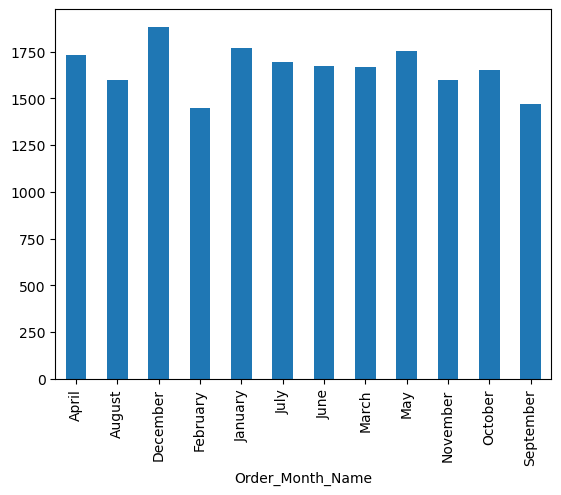

In [170]:
x.groupby(by='Order_Month_Name')['OrderID'].count().plot(kind='bar')

- Data Relationships & Reporting

1. I need a report showing the OrderID, customer's first and last name, and order date. This will help us track order fulfillment and customer satisfaction.


In [171]:
pd.merge(customers, orders, how='inner', on='CustomerID')[['FirstName','LastName','OrderID','OrderDate']]

,FirstName,LastName,OrderID,OrderDate
0,Danielle,Garcia,1098,2024-07-06
1,Angel,Jennings,426,2024-04-26
2,Angel,Jennings,647,2025-02-21
3,Angel,Jennings,762,2024-12-27
4,Joshua,Stephens,568,2025-03-13
...,...,...,...,...
1495,Stephanie,Dennis,781,2024-12-20
1496,Antonio,Flores,1203,2024-10-12
1497,Antonio,Flores,1465,2024-06-02
1498,Mitchell,Harper,79,2024-12-14


2. Can you list the OrderID, product name, and quantity for each item in the OrderItems table? This will help us understand product demand.


In [172]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID')
y = x[['FirstName','LastName','OrderID','ProductName','Quantity']]
y.sort_values(by = 'OrderID')
y

,FirstName,LastName,OrderID,ProductName,Quantity
0,Danielle,Garcia,1098,Keyboard,4
1,Danielle,Garcia,1098,Printer,3
2,Danielle,Garcia,1098,Sweater,1
3,Danielle,Garcia,1098,Wallet,3
4,Danielle,Garcia,1098,Poetry,2
...,...,...,...,...,...
2995,Stephanie,Dennis,781,Cutlery,2
2996,Mitchell,Harper,79,Shoes,2
2997,Mitchell,Harper,79,Science Fiction,1
2998,Scott,Chambers,716,Textbook,3


- DATA VISUALIZATION 

 Total Sales Per Product Category

In [173]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
x['OrderDate'] = pd.to_datetime(x['OrderDate'],errors='coerce')
x['OrderYear'] = x['OrderDate'].dt.year
x['Order_Month_Name'] = x['OrderDate'].dt.month_name()
x['Revenue'] = x['Quantity'] * x['UnitPrice']


In [174]:
x.groupby(by =['Category'])['Revenue'].sum().round(0)

Category
Books          3702181.0
Clothing       4337933.0
Electronics    4539472.0
Food           5334550.0
Home Goods     5104439.0
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Total Sales Per Product Category')

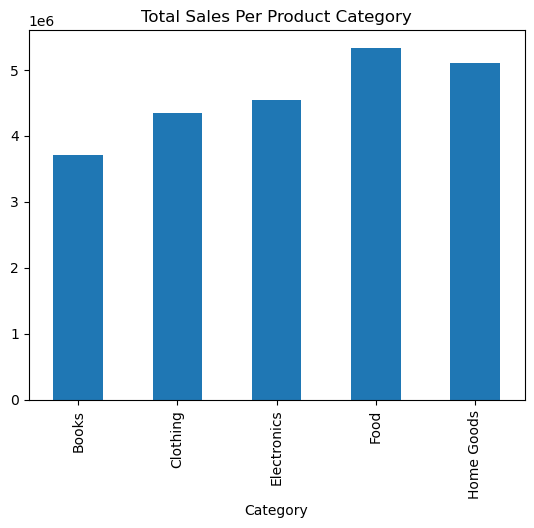

In [175]:
x.groupby(by =['Category'])['Revenue'].sum().plot(kind='bar')
plt.title('Total Sales Per Product Category')

Bar Chart: Monthly Sales Trends

Text(0.5, 1.0, 'Monthly Sales Trends')

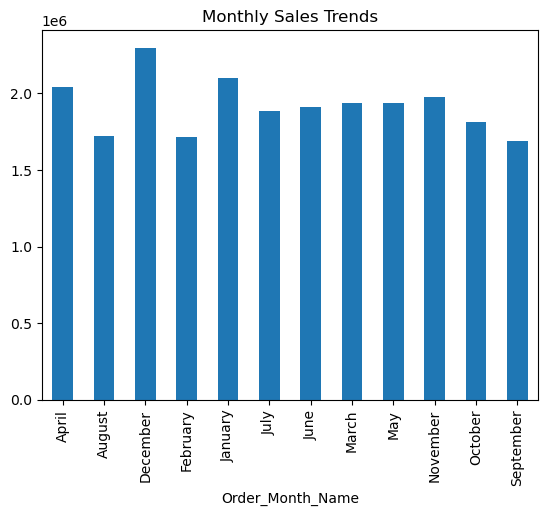

In [176]:
x.groupby(by=['Order_Month_Name'])['Revenue'].sum().plot(kind='bar')
plt.title('Monthly Sales Trends')

Top 5 Customers by Total Purchases


In [177]:
x = pd.merge(customers, orders, how='inner', on='CustomerID').merge(order_items, how='inner', on='OrderID').merge(products,how ='inner', on='ProductID').merge(sales, how='inner', on='OrderID').merge(salespersons, how='inner', on = 'SalesPersonID')
x['OrderDate'] = pd.to_datetime(x['OrderDate'],errors='coerce')
x['OrderYear'] = x['OrderDate'].dt.year
x['Order_Month_Name'] = x['OrderDate'].dt.month_name()
x['Revenue'] = x['Quantity'] * x['UnitPrice']
x['Cust_full_name'] = x['FirstName_x'] + x['LastName_x']


In [178]:
x.groupby(by='Cust_full_name')['Revenue'].sum().nlargest(5).round(0)

Cust_full_name
KathrynBruce    178734.0
ThomasReese     152824.0
AndreaPierce    140860.0
BrettEdwards    139470.0
EricDuran       128255.0
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Top 5 Customers by Total Purchases')

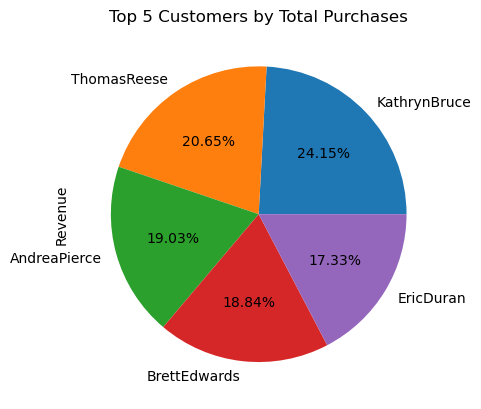

In [179]:
x.groupby(by='Cust_full_name')['Revenue'].sum().nlargest(5).plot(kind='pie', autopct = '%.2f%%')
plt.title('Top 5 Customers by Total Purchases')

Scatter Plot: Unit Price vs Profit


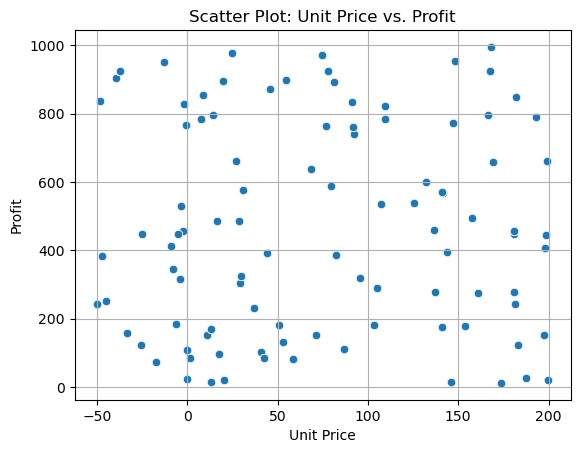

In [180]:
sns.scatterplot(data = x, y ='UnitPrice', x = 'Profit')
plt.xlabel('Unit Price')
plt.ylabel('Profit')
plt.title('Scatter Plot: Unit Price vs. Profit')
plt.grid(True)

In [181]:
x[['UnitPrice','Profit','Quantity']].corr()

,UnitPrice,Profit,Quantity
UnitPrice,1.000000,0.034809,-0.004216
Profit,0.034809,1.000000,0.015058
Quantity,-0.004216,0.015058,1.000000


##### Multivariate Analysis

Heatmap: Correlation Between Order Quantities and Product 

Text(0.5, 1.0, 'Correlation Heatmap: Quantity, Unit Price, and Profit')

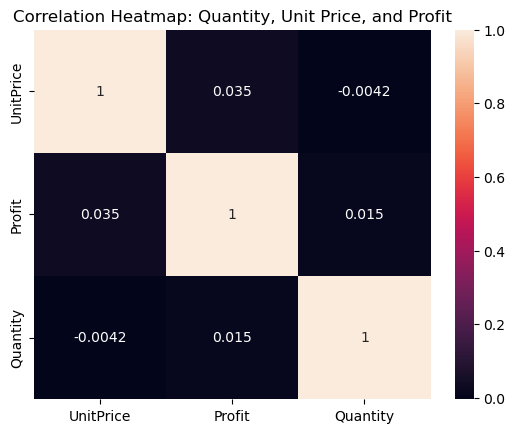

In [182]:
sns.heatmap(data = x[['UnitPrice','Profit','Quantity']].corr(), annot=True)
plt.title('Correlation Heatmap: Quantity, Unit Price, and Profit')

### EDA Summary

1. Profit by Region: 
    - The West region has the highest profit, totaling ₹400000.

2. Profit by Category:
    - The Home Goods category generates the highest profit with ₹350,000.

3. Quantity vs Profit Relationship: 
     - A scatter plot was used to analyze the relationship between quantity sold and profit, showing moderate positive correlation.

4. Top 5 Customers by Orders Placed: 
    - The top 5 customers placing the most orders were identified based on order count.

5. Customer Order Frequency: 
     - showed how many orders each customer has placed.

6. Order Details with Customer Info:
     - A joined table displayed Customer Full Name, Order Date, Product Name, and Quantity for each item ordered.

7. Total Revenue by Product Category: 
      - The Food category leads in revenue: ₹789,641.92 

8. Average Unit Price by Product Category:
     - Food products have the highest average unit price: ₹568.05

9. Product Profitability Analysis:Profitable Product: 
     - Cheese – ₹21,753 and Losing Product: Suace – ₹-3,883

10. Top-Selling Products by Region:Central: 
      - Hat (Qty: 210) East: Gloves (Qty: 176) North: Hat (Qty: 109) South: Gloves (Qty: 204) and West: Keyboard (Qty: 226)

11. Total Products Sold Per Product ID: 
      - Total quantity sold was calculated for each product ID to identify top-selling items.

12. Sales Contribution by Salesperson:
      - Percentage of total revenue contributed by each salesperson:
Christopher Stephens – 2.4%  
Ann Burgess – 2.6%  
Monica Morrow – 2.4%

13. Yearly Quantity Sold by Category
      - Year-wise Quantity Sold per Product Category

14. Monthly Order Volume: 
      - December recorded the highest number of orders among all months.

15. Total Sales Per Product Category: 
      - Food leads in sales with a total of ₹5,334,550.00.

16. Top 5 Customers by Total Purchases: 
      - Based on total purchase value:
Kathryn Bruce – ₹178,734  
Thomas Reese – ₹152,824  
Andrea Pierce – ₹140,860  
Brett Edwards – ₹139,470  
Eric Duran – ₹128,255

*Summary Statistics*

In [183]:
dataframes = {
    'customers': customers,
    'order_items': order_items,
    'orders': orders,
    'products': products,
    'sales': sales,
    'salespersons': salespersons
}

for name, df in dataframes.items():
    print(f"\n Descriptive Stats for '{name}' Dataset:")
    print(df.describe()) 



 Descriptive Stats for 'customers' Dataset:
        CustomerID       ZipCode
count  1000.000000   1000.000000
mean    500.500000  49281.365000
std     288.819436  28422.413692
min       1.000000    562.000000
25%     250.750000  24717.750000
50%     500.500000  49216.000000
75%     750.250000  73754.000000
max    1000.000000  99766.000000

 Descriptive Stats for 'order_items' Dataset:
       OrderItemID      OrderID    ProductID     Quantity
count  3000.000000  3000.000000  3000.000000  3000.000000
mean   1500.500000   757.187333    49.301333     2.494667
std     866.169729   430.904884    28.765158     1.120888
min       1.000000     3.000000     1.000000     1.000000
25%     750.750000   385.000000    24.000000     1.000000
50%    1500.500000   757.000000    49.000000     2.000000
75%    2250.250000  1135.250000    75.000000     4.000000
max    3000.000000  1500.000000    98.000000     4.000000

 Descriptive Stats for 'orders' Dataset:
           OrderID   CustomerID                

##### Perform Hypothesis Testing

T-Test : Compare Revenue Distribution Across Product Categories

Null Hypothesis (H0): There is no significant difference in revenue between Product Categories.  
Alternative Hypothesis (H1): There is a significant difference in revenue between two Product Categories.  

In [184]:
from scipy import stats
import pandas as pd

merged_df = pd.merge(order_items, products, on='ProductID')
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['UnitPrice']
electronics_revenue = merged_df[merged_df['Category'] == 'Electronics']['Revenue']
clothing_revenue = merged_df[merged_df['Category'] == 'Clothing']['Revenue']

t_stat, p_value = stats.ttest_ind(electronics_revenue, clothing_revenue, equal_var=False)

print(f"T-Test Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: Significant difference in revenue between Electronics and Clothing categories.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in revenue between categories.")


T-Test Statistic: 2.5849
P-Value: 0.0099
Reject Null Hypothesis: Significant difference in revenue between Electronics and Clothing categories.


- Revenue by Category

In [185]:

x =  pd.merge(order_items, products, on='ProductID')
x['Revenue'] = x['Quantity'] * x['UnitPrice']
revenue_by_category = x.groupby('Category')['Revenue'].sum().round(2).reset_index()
revenue_by_category


,Category,Revenue
0,Books,572987.10
1,Clothing,636548.24
2,Electronics,705128.12
3,Food,789641.92
4,Home Goods,777376.14


- Using Z-Test

Compare Revenue Between Category and Revenue

Null Hypothesis (H0): There is no significant difference in revenue between food category and home goods category.  
Alternative Hypothesis (H1): There is a significant difference in revenue between food category and home goods category.

In [186]:
from statsmodels.stats.weightstats import ztest

merged_df = pd.merge(order_items, products, on='ProductID')

merged_df['Revenue'] = merged_df['Quantity'] * merged_df['UnitPrice']

food_revenue = merged_df[merged_df["Category"] == "Food"]['Revenue']
goods_revenue = merged_df[merged_df["Category"] == "Home Goods"]['Revenue']

z_stat, p_value = ztest(food_revenue, goods_revenue)

print(f"Z-Test Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: Significant difference in revenue between Food and Home Goods.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in revenue between Food and Home Goods.")


Z-Test Statistic: 5.4137
P-Value: 0.0000
Reject Null Hypothesis: Significant difference in revenue between Food and Home Goods.


- Calculate Year Wise Revenue

In [187]:
x = pd.merge(order_items, orders, how='inner', on='OrderID').merge(products, how ='inner', on='ProductID')
x['Revenue'] = x['Quantity'] * x['UnitPrice']

x['OrderDate'] = pd.to_datetime(x['OrderDate'])
x['Year'] = x['OrderDate'].dt.year

year_revenue = x.groupby('Year')['Revenue'].sum().round(2).reset_index()
year_revenue


,Year,Revenue
0,2024,2616235.55
1,2025,865445.96


- Z-Test : Compare Revenue Before and After a Certain Year (e.g  2025)

Null Hypothesis (H0): The average revenue before 2016 is equal to the average revenue after 2025.  
Alternative Hypothesis (H1) : The average revenue before 2025 is different from after 2025. 

In [188]:
from statsmodels.stats.weightstats import ztest

x = pd.merge(order_items, orders, how='inner', on='OrderID').merge(products, how ='inner', on='ProductID')

x['OrderDate'] = pd.to_datetime(x['OrderDate'])

x['Year'] = x['OrderDate'].dt.year

x['Revenue'] = x['Quantity'] * x['UnitPrice']

before_2024 = x[x['Year'] < 2025]['Revenue']
after_2024 = x[x['Year'] >= 2025]['Revenue']

z_stat, p_value = ztest(before_2024, after_2024)

print(f"Z-Test Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: Revenue significantly changed after 2025.")
else: 
    print("Fail to Reject Null Hypothesis: No significant change in revenue after 2025.")


Z-Test Statistic: 0.1674
P-Value: 0.8670
Fail to Reject Null Hypothesis: No significant change in revenue after 2025.



- Chi-Square Test: Relationship Between Region and Product Category

Null Hypothesis (H0) : There is no relationship between region and product category.  
Alternative Hypothesis (H1) : There is a significant relationship between region and product category.  

In [189]:
from scipy.stats import chi2_contingency

x = pd.merge(sales, salespersons, on='SalesPersonID', how='inner').merge(order_items, on='OrderID', how='inner') .merge(products, on='ProductID', how='inner')

contingency_table = pd.crosstab(x['Region'], x['Category'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: Region and product category are related.")
else:
    print("Fail to Reject Null Hypothesis: No significant relationship between region and product category.")


Contingency Table:
 Category  Books  Clothing  Electronics  Food  Home Goods
Region                                                  
Central     830       958          915   830         976
East        704       816          739   728         898
North       429       447          443   428         526
South       727       889          843   769         962
West        906      1069          987   930        1181

Chi-Square Statistic: 10.7485
P-Value: 0.8247
Fail to Reject Null Hypothesis: No significant relationship between region and product category.


- A/B Testing: Compare Sales Performance Across Two Different States

Null Hypothesis (H0) :There is no difference in revenue between two selected states.  
Alternative Hypothesis (H1) : There is a significant difference in revenue between the two states.  

In [190]:
import pandas as pd
from scipy import stats

merged_df = pd.merge(orders, customers, on='CustomerID', how='inner') \
              .merge(order_items, on='OrderID', how='inner') \
              .merge(products, on='ProductID', how='inner')

merged_df['Revenue'] = merged_df['Quantity'] * merged_df['UnitPrice']

state_A = "North Carolina"
state_B = "South Carolina"

revenue_A = merged_df[merged_df['State'] == state_A]['Revenue']
revenue_B = merged_df[merged_df['State'] == state_B]['Revenue']


t_stat, p_value = stats.ttest_ind(revenue_A, revenue_B, equal_var=False)

print(f"A/B Test - T-Test Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print(f"Reject Null Hypothesis: Significant revenue difference between {state_A} and {state_B}.")
else:
    print(f"Fail to Reject Null Hypothesis / Accept Null Hypothesis: No significant revenue difference between {state_A} and {state_B}.")


A/B Test - T-Test Statistic: 0.5604
P-Value: 0.5772
Fail to Reject Null Hypothesis / Accept Null Hypothesis: No significant revenue difference between North Carolina and South Carolina.


##### Summary of Hypothesis Tests & Insights

- T-Test : Compare Revenue Distribution Across Product Categories
- Z-Test : Analyzes Revenue Between Category and Revenue
- Z-Test : Compare Revenue Before and After a Certain Year (e.g  2025)
- Chi-Square Test: Examines Relationship Between Region and Product Category
- A/B Testing: Compare Sales Performance Across Two Different States

#

#### Enhancing the Sales Analysis with Machine Learning & Advanced Analytics


In [191]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

- Customer Segmentation using KMeans with Customer Purchase Behavior

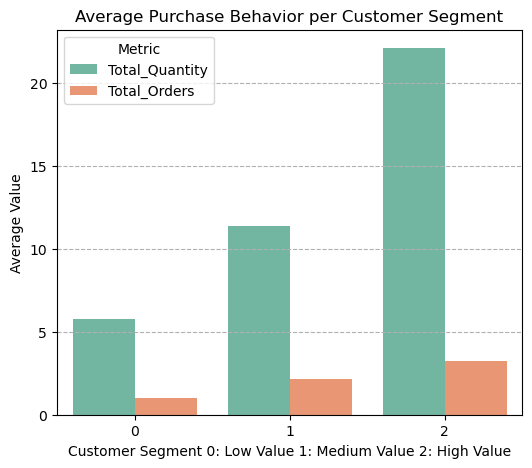

In [192]:
merged = pd.merge(orders, order_items, on='OrderID').merge(customers, on='CustomerID')

customer_data = merged.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'OrderID': 'nunique'
}).reset_index()

customer_data.columns = ['CustomerID', 'Total_Quantity', 'Total_Orders']

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Total_Quantity', 'Total_Orders']])


kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Segment'] = kmeans.fit_predict(scaled_features)


customer_data.to_csv('customer_segments.csv', index=False)

segment_summary = customer_data.groupby('Segment').agg({
    'Total_Quantity': 'mean',
    'Total_Orders': 'mean'
}).reset_index()

segment_melted = segment_summary.melt(id_vars='Segment', var_name='Metric', value_name='Average')


plt.figure(figsize=(6, 5))
sns.barplot(data=segment_melted, x='Segment', y='Average', hue='Metric', palette='Set2')
plt.title('Average Purchase Behavior per Customer Segment')
plt.xlabel('Customer Segment 0: Low Value 1: Medium Value 2: High Value')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.grid(True, axis='y', linestyle='--')
plt.show()


- Sales Forecasting (Time Series Prediction)

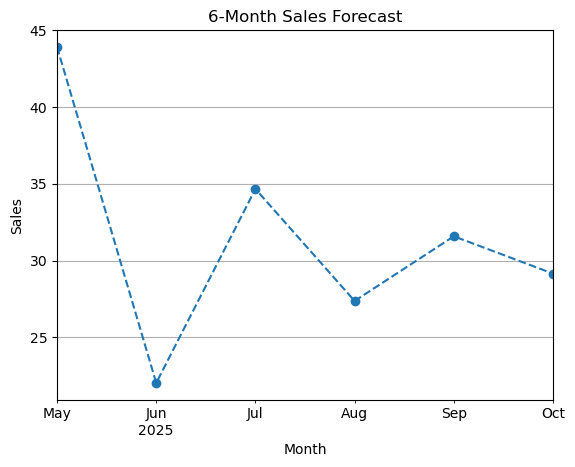

In [193]:
from statsmodels.tsa.arima.model import ARIMA
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

monthly_sales = orders.groupby(orders['OrderDate'].dt.to_period('M')).size()


monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales = monthly_sales.asfreq('MS')


model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()


forecast = model_fit.forecast(steps=6)
forecast.plot(marker='o', linestyle='dashed')
plt.title('6-Month Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


- Predicted Monthly Revenue for 2026

R² Score on Test Data: 0.874


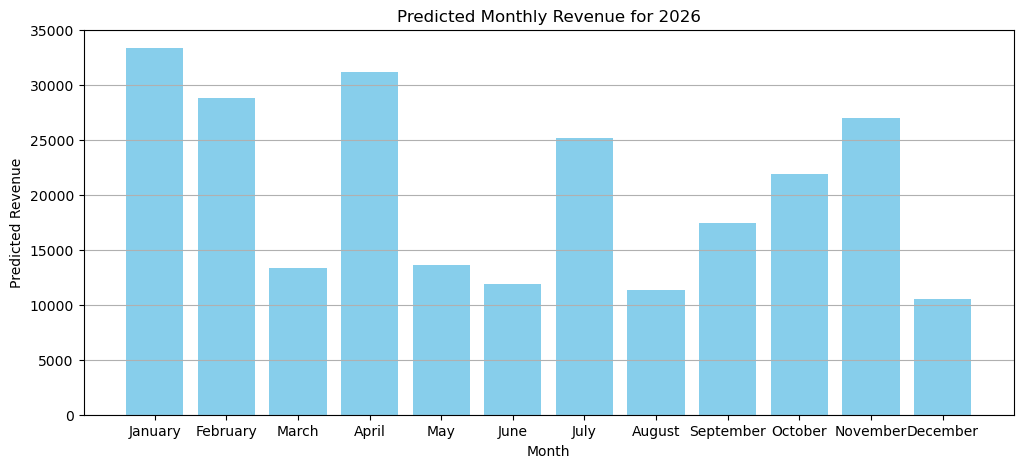

        Month  PredictedRevenue
0     January           33367.0
1    February           28857.0
2       March           13312.0
3       April           31201.0
4         May           13658.0
5        June           11887.0
6        July           25221.0
7      August           11357.0
8   September           17426.0
9     October           21938.0
10   November           26985.0
11   December           10492.0


In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import calendar


df = order_items.merge(products, on="ProductID").merge(sales, on="OrderID")


df['Revenue'] = df['Quantity'] * df['UnitPrice']


X = df[['Quantity', 'UnitPrice', 'CommissionRate']]  
y = df['Revenue'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("R² Score on Test Data:", round(r2_score(y_test, y_pred), 3))


months = list(calendar.month_name[1:]) 
simulated_2026 = pd.DataFrame({
    'Month': months,
    'Quantity': np.random.randint(20, 80, size=12),
    'UnitPrice': np.random.uniform(30, 100, size=12),
    'CommissionRate': np.random.uniform(0.02, 0.08, size=12)
})


X_future = simulated_2026[['Quantity', 'UnitPrice', 'CommissionRate']]
simulated_2026['PredictedRevenue'] = model.predict(X_future)

plt.figure(figsize=(12, 5))
plt.bar(simulated_2026['Month'], simulated_2026['PredictedRevenue'], color='skyblue')
plt.title("Predicted Monthly Revenue for 2026")
plt.xlabel("Month")
plt.ylabel("Predicted Revenue")
plt.grid(axis='y')
plt.show()


print(simulated_2026[['Month', 'PredictedRevenue']].round())


- Forecasting Revenue by Region

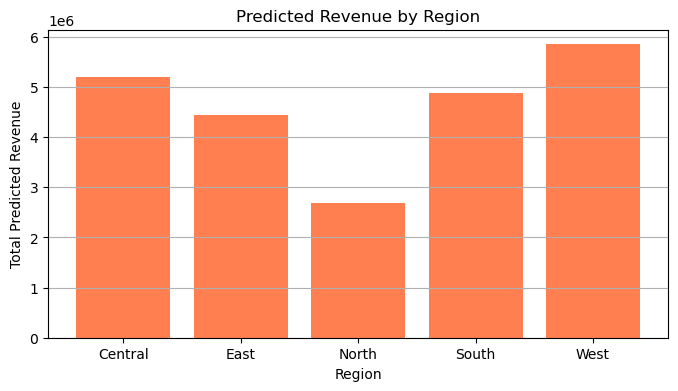

    Region  PredictedRevenue
0  Central         5198322.0
1     East         4447451.0
2    North         2681319.0
3    South         4879722.0
4     West         5851790.0


In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


df = order_items.merge(products, on="ProductID").merge(sales, on="OrderID").merge(salespersons, on="SalesPersonID")


df['Revenue'] = df['Quantity'] * df['UnitPrice']


X = df[['Quantity', 'UnitPrice', 'CommissionRate']]
y = df['Revenue']
regions = salespersons['Region']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


df['PredictedRevenue'] = model.predict(df[['Quantity', 'UnitPrice', 'CommissionRate']])


region_forecast = df.groupby('Region')['PredictedRevenue'].sum().reset_index()


plt.figure(figsize=(8, 4))
plt.bar(region_forecast['Region'], region_forecast['PredictedRevenue'], color='coral')
plt.title("Predicted Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Predicted Revenue")
plt.grid(axis='y')
plt.show()

print(region_forecast.round(0))
